In [1]:
import sys
sys.path.append('..')

In [2]:
from netket.graph import Hypercube, Triangular, Honeycomb, Kagome
from matplotlib import pyplot as plt
from Lattice import Rectangular
from Utils import plot_spectrum
from pathlib import Path
import netket as nk

This script generates a plot used for comparison of the energy spectra for different lattice layouts.

In [3]:
image_path = Path('./ThesisGraphics')
image_name = 'LatticeSpectrumComparison.png'

In [4]:
L, J = 12, 1
n_eval = 500
titles = ['Chain', 'Rectangular', 'Triangular', 'Hexagonal', 'Kagome']
lattices = [Hypercube, Rectangular, Triangular, Honeycomb, Kagome]
lattice_params = [dict(length=12, n_dim=1), dict(extent=[4, 3]), 
                  dict(extent=[4, 3]), dict(extent=[3, 2]), dict(extent=[2, 2])]
hilbert = nk.hilbert.Spin(s=1/2, N=L)

In [5]:
evals_list = []
for index, (Lattice, l_params) in enumerate(zip(lattices, lattice_params)):
    lattice = Lattice(pbc=True, **l_params)
    hamiltonian = nk.operator.Heisenberg(hilbert=hilbert, graph=lattice, J=J)
    evals = nk.exact.lanczos_ed(hamiltonian, k=n_eval, compute_eigenvectors=False)
    evals_list.append(evals)
    print(index)

0
1
2
3
4


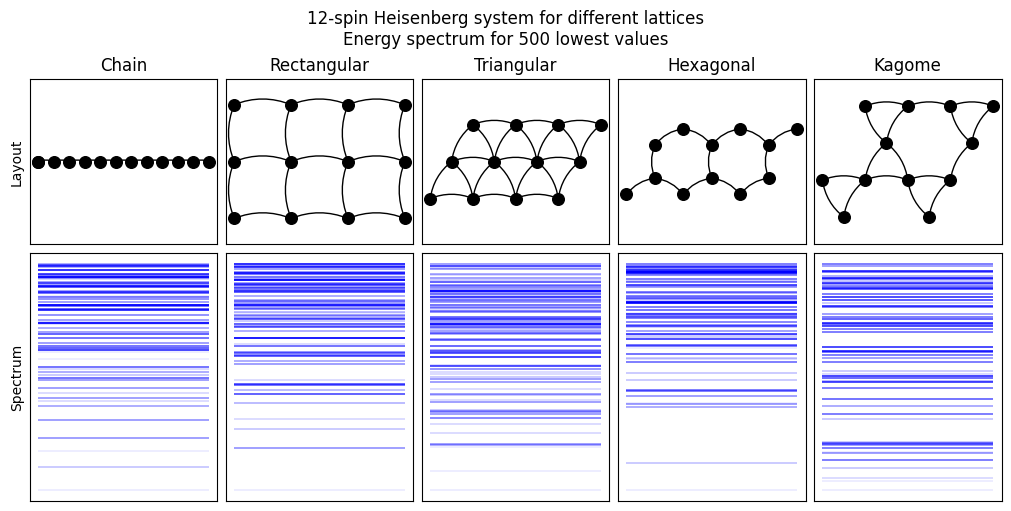

In [12]:
figure, axes = plt.subplots(2, 5, figsize=(10, 5), layout='constrained', height_ratios=[2, 3])
for index, (Lattice, l_params, evals, title) in enumerate(zip(lattices, lattice_params, evals_list, titles)):
    lattice = Lattice(pbc=False, **l_params)
    lattice.draw(ax=axes[0, index], node_color='black', font_color='black', 
                 edge_color='Black', node_size=70, font_size=1)
    plot_spectrum(evals, axes[1, index], linewidth=0.1, scatter=False, ylabel=False)
    axes[0, index].set(title=title)
for ax in figure.axes:
    ax.set(xticks=[], yticks=[], ylabel=None)
axes[0, 0].set(ylabel='Layout')
axes[1, 0].set(ylabel='Spectrum')
figure.suptitle(f'{L}-spin Heisenberg system for different lattices\n'
                f'Energy spectrum for {n_eval} lowest values')
figure.savefig(image_path / image_name);